In [6]:
] activate ../../Acceleration

 Activating environment at `~/Desktop/Code/Acceleration/Acceleration/Project.toml`


In [238]:
using Acceleration
using LinearAlgebra

n = 2000; # number of samples
d = 50;    # number of features
selected_labels = [0,1];  ## Only two labels allowed

data, labels = load_dataset("MNIST",[0,1],n,d);
f,∇f,∇ϕ_cjg,σ,L,μ  = linear_regression(data,labels);
μ2 = μ

┌ Info: Loading dataset MNIST with 60000 samples and 784 features
└ @ Acceleration /Users/victor/Desktop/Code/Acceleration/Acceleration/src/datasets.jl:26


35.96472647525346

In [239]:
n = size(data,2)
x_ini = zeros(n)


using JuMP
using Ipopt

@time model = Model(with_optimizer(Ipopt.Optimizer))
@time set_silent(model)
@time @variable(model, x[1:n])
@time @objective(model, Min, f(x))
@time optimize!(model)
@time x_opt = value.(x);

  0.000169 seconds (652 allocations: 36.172 KiB)
  0.000004 seconds
  0.033272 seconds (63.86 k allocations: 3.307 MiB)
  0.181609 seconds (46.85 k allocations: 110.930 MiB, 13.38% gc time)
  0.003689 seconds (911 allocations: 173.641 KiB)
  0.000056 seconds (603 allocations: 12.234 KiB)


In [423]:
n = length(x_ini)
x = x_ini;
y = zeros(n);
z = zeros(n);
v = zeros(n);
A = 0;
AX = zeros(n);

k = 10000;
yks = zeros(n,k);
zks = zeros(n,k);
μ = 0;
s = zeros(n);
noise = 0;
α = 1;
accu_noise = 0;

for i=1:k   
   
    a = (L-μ); b = -(2*μ*A+σ); c = -μ*A^2 - σ*A;
    #α = (-b + sqrt(b^2 - 4*a*c)) / (2*a);
    #α = (σ/L) / sqrt(i);
    α = 1/max(accu_noise,1)^((i/n)^(1/2)) * ((-b + sqrt(b^2 - 4*a*c)) / (2*a));
    α = (-b + sqrt(b^2 - 4*a*c)) / (2*a);

    println(accu_noise/A)
    
    A = A + α;
    
    x = inv(A/α - μ*α/(μ*A+σ)) * ((A-α)/α *y + (μ*(A-α)+σ)/(μ*A + σ) * v);
    AX = AX + α*x;
    
    #η = inv(3*α)*(z-s-α*∇f(x));
    #η = -∇f(x) + sign.(∇f(x)) .* (abs.(∇f(x)) .> norm(∇f(x),Inf)/2) .* norm(∇f(x),Inf)/2;
    η = sign.(∇f(x))
    #η = zeros(n)

    approx_gradient = ∇f(x)+η; #(2/3)*∇f(x) + inv(3*α)*(z-s)    
    noise = α*η'*(x_opt - z)
    #noise = α*η'*(s-z) + α^2*(norm(approx_gradient,2)^2 - approx_gradient'*∇f(x) + 0.5*norm(η,2)^2);
    accu_noise = accu_noise + noise;
    
    s = s + α*η;
    z = z - α*approx_gradient;
    
    v = (z + μ*AX)*inv(1 + μ*A);
    y = (A-α)*inv(A)*y + α*inv(A)*v; 
    
    yks[:,i] = y;
    zks[:,i] = z;

end

x_out = yks;
x_gd = gradient_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
x_amd = accelerated_mirror_descent(f,∇f,∇ϕ_cjg,x_ini,σ,L,k);
x_amd2 = SCVX_AMD(f,∇f,∇ϕ_cjg,x_ini,σ,L,μ2,k);

NaN
-1.5831533788301122
-1.3867539978636394
-1.2487738968695064
-1.0990642628794853
-1.162966996790384
-1.305635078650722
-1.4194234646018873
-1.473025771092706
-1.4882018174226501
-1.4733942582028887
-1.4544474608218065
-1.4240853329163847
-1.3845957894989283
-1.3425290236432488
-1.2999780452276262
-1.2530863857679424
-1.2097018150526613
-1.1631680611271233
-1.1164449877576688
-1.0684953316972452
-1.022445436410068
-0.9739978205139987
-0.9298429930326576
-0.8921195121765244
-0.8574831719679358
-0.8215771000911345
-0.7841173104758136
-0.748265492780793
-0.7079809731736023
-0.6736912053890786
-0.6388025356765985
-0.6062630463033382
-0.5780842272681433
-0.5509626417491171
-0.5247842719687996
-0.5008962170497049
-0.47662369118968784
-0.4563372986816865
-0.43176963313358574
-0.41147517117790405
-0.3902099496731693
-0.36804277574311606
-0.3468475572583852
-0.32840270527107457
-0.3086721318326987
-0.29129885493615865
-0.2770410400218706
-0.2605499056939056
-0.24890163693154135
-0.24082909972

-0.6607984832592447
-0.6616495854665819
-0.6626150689251525
-0.6633406617070335
-0.6644021324544445
-0.6652214464470727
-0.6661571459809148
-0.6671263415698018
-0.6679428321670435
-0.6689131644048849
-0.6697591042381449
-0.6706051423407885
-0.6715460266609703
-0.6724855340774181
-0.6733016530909479
-0.674273367838641
-0.6750918820229316
-0.6760606883709978
-0.6769098111827911
-0.6777519757269498
-0.6786978626592326
-0.6796316535938459
-0.6804545965873113
-0.6814188355638754
-0.6822458335112325
-0.6832056088422155
-0.6840621970092565
-0.6847753139872634
-0.6858491514762555
-0.6866558690031747
-0.6876050766335998
-0.6884453059658973
-0.6893946993565759
-0.69035114640626
-0.691208143833947
-0.6920433328530536
-0.6929943981904061
-0.6939251263632341
-0.6947498164665586
-0.6957144880497582
-0.6965397001087882
-0.6975034212988648
-0.6983572306416463
-0.6991963509146587
-0.700144856246623
-0.7010776572465522
-0.7019011671388665
-0.702866466216845
-0.7036919610938454
-0.7046548598658777
-0.705

-1.040238403252751
-1.041208056700207
-1.0420592640497768
-1.0429056307877125
-1.0438505908631288
-1.044791504215577
-1.0456106834587242
-1.0465848089638605
-1.0474051867255023
-1.0483775644418356
-1.0492274602379021
-1.0500743090300462
-1.0510197107924746
-1.051959295136071
-1.0527807420305546
-1.0537517396949359
-1.0545761263603177
-1.0555437047214151
-1.0563969036823115
-1.0571186914696753
-1.0581879435296297
-1.0590040783190573
-1.0599480819345541
-1.0607982786742827
-1.0617417962390214
-1.0627091566239357
-1.0635598684073302
-1.0644061474458357
-1.0653502950209985
-1.0662925591469399
-1.0671100270332525
-1.068086456607003
-1.06890411767634
-1.0698798263943161
-1.0707259889939615
-1.0715771555759583
-1.0725178782209126
-1.0734626744221982
-1.074278596936548
-1.0752556139927354
-1.076073693854824
-1.0770480448060002
-1.0778965229658342
-1.0787444972969373
-1.0796869922630317
-1.0805081586329872
-1.0814465896452208
-1.0823013960656211
-1.0832408841682923
-1.084095474718242
-1.0850621

-1.4757714577249337
-1.47662505782974
-1.4775663134531873
-1.4784184734700243
-1.4793892752576616
-1.4801172910262936
-1.481181358696561
-1.4821217258705417
-1.482939221749919
-1.4839155056385613
-1.4847335272289837
-1.4857099493144796
-1.4865561343620337
-1.4874084757001067
-1.4883486396930892
-1.489295163352491
-1.4901100568717203
-1.491089225641648
-1.4919058330576345
-1.4928827266938485
-1.4937294267761283
-1.494580252901928
-1.4955229333612172
-1.496465966689323
-1.497285297540078
-1.4982591247852095
-1.4990797080418021
-1.4999307918445262
-1.5009021216449356
-1.5016285202941935
-1.5026947590490352
-1.5035157949192932
-1.50445547075673
-1.505427975878434
-1.5062474365544718
-1.5072215189145866
-1.5080692937109983
-1.508920283890975
-1.5098615711350012
-1.5108072761281508
-1.5116227019290227
-1.512601680362162
-1.513418179945208
-1.514395508837901
-1.515241505072959
-1.5160933333540205
-1.51703476638529
-1.5179793263672359
-1.5187968983225792
-1.5197727561591685
-1.520593321709679


-1.9078511561069342
-1.908829874748675
-1.9096744265950127
-1.9105281801669292
-1.9114676378287838
-1.912414595546467
-1.9132297823799649
-1.9142084288012857
-1.9150261978430152
-1.916001742877951
-1.9168504307657965
-1.9176991182637153
-1.91864239158489
-1.9194637540562167
-1.9204033576097905
-1.9212577127788333
-1.9221989058214564
-1.9230525145064077
-1.924021489224459
-1.9248689146438747
-1.9258109949253115
-1.9267553201968055
-1.9275714324288573
-1.9285503405393074
-1.929366646935959
-1.9303448845916038
-1.9311896732331613
-1.9320434600004768
-1.9329826297187571
-1.933930130287304
-1.9347445477127703
-1.9357241893942023
-1.9365407596026416
-1.9375177130092796
-1.9383647997896751
-1.9392152926003208
-1.94015871579735
-1.9411010368716373
-1.9419193934390029
-1.9427733310401702
-1.943714421156657
-1.9445669818203382
-1.9455375905686856
-1.9462660522183477
-1.9473298502120506
-1.9482708164695761
-1.9490880505616126
-1.9500648734939265
-1.9508825452306833
-1.9518595926716071
-1.95270537

-2.3381776345739986
-2.339029732775372
-2.340000312988479
-2.3407277066562924
-2.34179316982334
-2.342615184503909
-2.343554161054682
-2.3445277002973293
-2.345346495701854
-2.346321523750988
-2.3471686438594186
-2.3480205964017418
-2.3489611656407794
-2.3499078548330403
-2.350722599919521
-2.351702529118437
-2.3525183213806073
-2.3534966249406732
-2.3543419424138436
-2.355194742364432
-2.3561354549682596
-2.35708098527244
-2.3578978984082855
-2.358874667343602
-2.3596945751899274
-2.360667838847241
-2.3615170000950934
-2.362244230556213
-2.3633093157384564
-2.3641305701329225
-2.365070874402712
-2.3659257121029387
-2.3668658823162803
-2.367837939649776
-2.3686858439144194
-2.369536057207595
-2.3704776319873444
-2.3714234958446037
-2.3722388587049776
-2.373218416936488
-2.3740343112326636
-2.3750127964086905
-2.3758576557923896
-2.3767111830616265
-2.3776509191375537
-2.378597663778308
-2.379413139786406
-2.3803915662610975
-2.381209603704537
-2.382184950582248
-2.3830339062149446
-2.3

-2.7667094665885843
-2.767688063814724
-2.7685047242652994
-2.769482687369254
-2.7703278255112442
-2.771181363522739
-2.7721208241983675
-2.7730681097886523
-2.7738828218694196
-2.774862250186085
-2.775679072088961
-2.7766558560316787
-2.7775031837386304
-2.778353537469022
-2.779297140108682
-2.7802393575704043
-2.781057984162932
-2.781911801780082
-2.7828530325613956
-2.783705481400329
-2.784676255556508
-2.785404600884195
-2.7864685370529405
-2.7874094915678755
-2.7882269131677555
-2.7892036272268035
-2.790021439195824
-2.7909984266027146
-2.791844333705906
-2.7926973462061975
-2.7936370640664934
-2.794584373148544
-2.7953987848170083
-2.7963787801790656
-2.797194784761576
-2.798172622833752
-2.7990186717324588
-2.799870524716574
-2.8008124127603384
-2.8017565576591434
-2.8025750921127974
-2.8035500377241918
-2.804369939609126
-2.8052221852872887
-2.8061926259869425
-2.8069201606372136
-2.8079854773854476
-2.8088076279616048
-2.809746481154123
-2.810720180890133
-2.811538863016072
-2

-3.2032780766564826
-3.2042183184579076
-3.2050731824002066
-3.20601331357632
-3.2069854419407515
-3.2078333638906913
-3.2086835734039303
-3.2096251499920063
-3.2105710085482646
-3.211386401323863
-3.2123659301597396
-3.2131818493482345
-3.2141603111417973
-3.215005212744654
-3.2158587134968712
-3.216798472940435
-3.21774519203213
-3.218560717468988
-3.2195390956912946
-3.220357176946993
-3.2213324815841813
-3.222181498801451
-3.223029955616651
-3.2239736365627736
-3.224794762115557
-3.2257346761499446
-3.2265887217179072
-3.2275302418415954
-3.228383527106946
-3.2293528858769123
-3.2302000890802707
-3.231142557870574
-3.2320865608587805
-3.2329030797107787
-3.2338816560772052
-3.234698321667828
-3.2356762780513764
-3.236521418245982
-3.2373749593169627
-3.2383144019730175
-3.23926170219691
-3.2400763976754408
-3.241055840619892
-3.2418726327187235
-3.2428494444825233
-3.2436967406789203
-3.2445471301137174
-3.2454906835743302
-3.24643294553934
-3.247251558463807
-3.2481054113386323
-3

-3.634545897692104
-3.6355259170192764
-3.6363418713642166
-3.637319745804359
-3.6381657502031683
-3.639017643929233
-3.6399594672479587
-3.640903659214332
-3.641722143559496
-3.642697123573599
-3.643517016210728
-3.6443692948960447
-3.6453396876812603
-3.6460672372166214
-3.6471325080759
-3.647954658309783
-3.6488935009421137
-3.6498672191755577
-3.6506859096251003
-3.6516610394405875
-3.652508066054892
-3.653360128466054
-3.654300565714066
-3.6552473787231063
-3.65606201542919
-3.657042049369296
-3.6578577132070165
-3.658836141885951
-3.659681343771874
-3.66053427451535
-3.661474836646618
-3.6624205070979348
-3.6632372988094364
-3.664214182388246
-3.6650339563008334
-3.6660073465951206
-3.666856485803178
-3.6675838220595747
-3.668648769732305
-3.669470096827936
-3.6704103342637087
-3.6712651787894233
-3.6722053088206357
-3.6731774399318353
-3.674025375744624
-3.6748755657666488
-3.675817145139764
-3.67676298912829
-3.6775783893215315
-3.6785579004278337
-3.6793738198021972
-3.6803522

-4.0648781603802036
-4.065732207397919
-4.066673690076303
-4.067526970762345
-4.068496311843617
-4.069343538457374
-4.070285994333845
-4.071229986571326
-4.072046502327164
-4.07302506047254
-4.0738417136728975
-4.074819661797755
-4.075664793194411
-4.07651833071455
-4.0774577472179265
-4.078405050906688
-4.079219729019632
-4.080199168556871
-4.08101593393258
-4.081992751821477
-4.0828400257382675
-4.083690424677788
-4.084633940298977
-4.085576216623079
-4.086394841579162
-4.087248692113306
-4.08818983541331
-4.0890423081940375
-4.090013028896013
-4.090741378834947
-4.091805258113254
-4.0927462729308735
-4.09356369169173
-4.094540381470209
-4.095358173704272
-4.096335154889244
-4.0971810483747895
-4.0980340635491315
-4.098973736009459
-4.0999210612338235
-4.100735442206671
-4.101715442528893
-4.1025313983147065
-4.103509259838141
-4.104355266357192
-4.105207150453958
-4.106148966502249
-4.107093153082059
-4.107911633764447
-4.108886605635918
-4.109706508347634
-4.110558780576585
-4.1115

-4.491646959225253
-4.492498998863226
-4.493439428581658
-4.494386226632725
-4.495200860444783
-4.496180876587449
-4.4969965271009995
-4.49797494875779
-4.4988201376140795
-4.4996730675016865
-4.500613600497859
-4.501559277766163
-4.502376045505891
-4.503352932116569
-4.504172673012031
-4.505146075352496
-4.5059952145796665
-4.506722560995054
-4.507787464325367
-4.508608795624417
-4.509549007344791
-4.510403839130481
-4.511343947218993
-4.512316093532118
-4.513164026439716
-4.514014204020363
-4.514955766286298
-4.515901604067925
-4.516716993232378
-4.5176964938834505
-4.518512393285195
-4.519490843846765
-4.520335728033665
-4.5211892266959435
-4.522128941931689
-4.523075670992553
-4.523891162650209
-4.52486954296007
-4.525687575544293
-4.526662897250459
-4.527511870714621
-4.528360350535776
-4.529304018447339
-4.530125164825838
-4.531065026699429
-4.531919061343274
-4.532860538119905
-4.533713804332055
-4.5346831469923785
-4.535530370653133
-4.536472829563977
-4.537416805774703
-4.5382

-4.912159282832998
-4.912975938527178
-4.913953863475292
-4.9147989989095064
-4.9156525172527585
-4.916591925417389
-4.917539215575877
-4.918353890070551
-4.919333312683368
-4.920150067101056
-4.9211268755813
-4.9219741401959345
-4.92282453327793
-4.923768027998029
-4.924710303064218
-4.9255289382325405
-4.9263827779523055
-4.927323900544049
-4.928176359280182
-4.9291470715333565
-4.929875400621686
-4.930939269907708
-4.931880284532774
-4.932697712488491
-4.933674371879525
-4.934492166544964
-4.935469124631151
-4.936315021999696
-4.937168018190172
-4.938107682040018
-4.939054994189695
-4.939869370838993
-4.940849355173647
-4.941665298868536
-4.942643152389867
-4.943489147874677
-4.944341028114043
-4.9452828209667725
-4.946227008965029
-4.947045471643685
-4.948020440820017
-4.948840344170922
-4.949692615355796
-4.950662979404409
-4.951390510239739
-4.952455749310522
-4.953277872354316
-4.954216709389719
-4.955190421292501
-4.9560091177681285
-4.9569842087856255
-4.957831244127281
-4.958

-5.586328198049643
-5.587145990174304
-5.588122936862058
-5.58896883253007
-5.589821819645453
-5.590761474709151
-5.59170878110731
-5.5925231514759215
-5.593503128327282
-5.594319061394493
-5.595296911895121
-5.59614289745881
-5.59699477692946
-5.597936553049177
-5.598880743156942
-5.599699192208833
-5.600674160996099
-5.601494061496928
-5.602346333068261
-5.6033166818234745
-5.604044209046836
-5.605109432208977
-5.605931548482428
-5.606870378546795
-5.607844090085452
-5.6086627838243
-5.609637863404555
-5.61048489736741
-5.611336918316902
-5.612277334746049
-5.613224119486054
-5.61403874546388
-5.615018744397581
-5.6158343794658725
-5.616812791829643
-5.6176579669442095
-5.618510891460183
-5.6194513981610905
-5.620397075308274
-5.621213822648254
-5.622190704466028
-5.623010418469934
-5.623983822515639
-5.624832964845036
-5.6255603100560085
-5.626625179215148
-5.627446502928759
-5.628386697840128
-5.629241506186956
-5.630181601825164
-5.631153747955721
-5.63200168595417
-5.632851838414

-5.996926666023942
-5.997775810017693
-5.998503153336564
-5.999568014690276
-6.000389335052652
-6.001329526363153
-6.002184327536301
-6.003124420513397
-6.004096565454247
-6.0049445050283525
-6.005794650211648
-6.006736204621705
-6.007682015948428
-6.008497404643529
-6.009476873534288
-6.010292763345898
-6.011271191804433
-6.012116068526386
-6.01296955006966
-6.01390924203335
-6.014855960836285
-6.015671436070045
-6.016649800907025
-6.017467808325613
-6.018443123426608
-6.019292074994399
-6.020140551661102
-6.021084216797028
-6.021905358618732
-6.022845193637219
-6.0236992043276
-6.024640659565565
-6.025493896986413
-6.026463234602782
-6.027310453872802
-6.028252911275123
-6.029196854574803
-6.030013382887468
-6.030991884153939
-6.031808536783582
-6.032786442138733
-6.0336315757247805
-6.0344850782393245
-6.035424473268472
-6.036371752812257
-6.037186418317894
-6.038165827350882
-6.038982566094812
-6.039959367825025
-6.040806618220187
-6.041657007777103
-6.042600477822341
-6.0435427534

-6.408365853296354
-6.4093131304611
-6.4101277928224505
-6.411107198667837
-6.411923932610399
-6.4129007328453325
-6.41374797886789
-6.414598367696325
-6.415541830754475
-6.416484106700009
-6.417302745572167
-6.4181565752372745
-6.419097666635561
-6.419950111493941
-6.420920806621006
-6.421649113918111
-6.422712964559326
-6.423653980522724
-6.424471411838899
-6.425448038111863
-6.426265828779253
-6.427242761689808
-6.428088657038017
-6.428941632373786
-6.429881280407554
-6.430828578032749
-6.431642944108809
-6.432622910227553
-6.433438834947189
-6.434416678898401
-6.4352626570235145
-6.436114531973671
-6.43705629410765
-6.4380004823713275
-6.438818920657169
-6.439793884997836
-6.440613785516788
-6.441466053305159
-6.4424363898573045
-6.443163909275844
-6.444229119681405
-6.445051224989271
-6.445990051151203
-6.4469637580346015
-6.447782452047088
-6.448757516070644
-6.449604551608629
-6.450456558826544
-6.451396970293588
-6.452343744215387
-6.453158367963647
-6.454138354175218
-6.454953

-6.840446189696843
-6.8413009784306205
-6.842241064970173
-6.843213208477939
-6.844061149536365
-6.844911281934807
-6.845852832286241
-6.846798633188116
-6.847614020411637
-6.848593477062036
-6.8494093618678145
-6.850387781817793
-6.851232654177549
-6.85208612920543
-6.853025810801193
-6.853972525771794
-6.8547879930481805
-6.855766352245311
-6.8565843483380045
-6.8575596612105265
-6.858408602552741
-6.859257078381865
-6.860200740281069
-6.861021880844006
-6.861961703603564
-6.862815705915432
-6.863757150790122
-6.86461037810643
-6.865579711421731
-6.866426929722145
-6.867369384088279
-6.8683133158566045
-6.869129843951366
-6.8701083316450715
-6.87092498075648
-6.871902876080588
-6.8727480069037625
-6.873601501299619
-6.874540887623257
-6.8754881617301224
-6.876302820873521
-6.877282222757314
-6.878098951678167
-6.879075749795475
-6.879922991278671
-6.880773378820978
-6.8817168344787625
-6.882659110225063
-6.883477749665687
-6.884331576627498
-6.885272660850394
-6.886125102091564
-6.88

-7.277932545887469
-7.278907506785124
-7.279727406556927
-7.2805796714254045
-7.281549997818899
-7.28227751123058
-7.2833427110450435
-7.2841648079173655
-7.285103630299915
-7.286077333605851
-7.286896027055513
-7.287871079106863
-7.288718115089425
-7.289570111732859
-7.290510518621421
-7.291457284200742
-7.292271905486581
-7.293251881875966
-7.294067504976883
-7.295045902375693
-7.295891066823222
-7.296743980299988
-7.29768446440665
-7.298630135703561
-7.299446865556129
-7.30042373756837
-7.301243427699937
-7.302216828346623
-7.303065974163441
-7.303793313705585
-7.304858151424668
-7.305679463999224
-7.306619643095692
-7.307474426080572
-7.3084145094786495
-7.309386652255717
-7.31023459379262
-7.311084720275382
-7.312026268580936
-7.312972064638642
-7.313787451002773
-7.314766901974381
-7.315582784313877
-7.316561200281866
-7.317406070475734
-7.318259542424672
-7.319199219120095
-7.320145932229389
-7.320961395713079
-7.321939752216417
-7.322757742986072
-7.323733054714568
-7.324581991

-7.711013785395091
-7.711858913914066
-7.712712401539144
-7.713651780908702
-7.714599050343872
-7.7154137043651865
-7.716393100239639
-7.717209821327448
-7.718186616205905
-7.719033850565089
-7.719884236124051
-7.720827680367408
-7.721769955766631
-7.722588595703008
-7.723442418582136
-7.7243834917083625
-7.725235927507512
-7.726206612351128
-7.726934906035611
-7.727998745678155
-7.728939760808072
-7.729757193543145
-7.730733799622277
-7.73155158772316
-7.732528504755092
-7.7333743987580466
-7.734227360517121
-7.735166999607575
-7.736114287088745
-7.736928647249049
-7.737908601068693
-7.738724515266741
-7.739702351666457
-7.740548320250797
-7.741400189970547
-7.742341935164059
-7.743286121241368
-7.7441045461770965
-7.745079505432516
-7.745899404704474
-7.7467516681777155
-7.747721989719292
-7.748449500314237
-7.74951469507254
-7.750336788009939
-7.751275608479517
-7.752249310098684
-7.753068003118689
-7.7540430496070405
-7.75489008562317
-7.755742077351306
-7.756682481950939
-7.757629

-8.148495069864095
-8.149343012168119
-8.150193129362489
-8.151134674626329
-8.152080463008893
-8.152895848130493
-8.153875290160656
-8.154691168831691
-8.155669578420937
-8.15651444540205
-8.15736791233711
-8.158307581684726
-8.159254291622595
-8.160069749430722
-8.161048101507387
-8.16186608428288
-8.162841393933496
-8.16369032323321
-8.164538797423948
-8.165482455310013
-8.166303593741885
-8.167243402148314
-8.168097394152534
-8.169038826856141
-8.169892041876324
-8.17086136998166
-8.171708586459795
-8.172651037073187
-8.173594954898407
-8.174411482477845
-8.17538995388332
-8.176206598693675
-8.177184481792992
-8.178029609181584
-8.178883093548977
-8.179822469615003
-8.180769736774709
-8.181584388345545
-8.182563781322333
-8.18338049869131
-8.18435729196824
-8.185204522937042
-8.186054907483431
-8.186998346330137
-8.187940621483612
-8.18875926158272
-8.18961308247454
-8.190554150346891
-8.191406583526554
-8.192377265348041
-8.193105555142326
-8.19416939155854
-8.195110406378978
-8.1

-8.583210708201127
-8.584185664909624
-8.585005563237337
-8.585857824534179
-8.586828138495566
-8.587555644737064
-8.588620831610616
-8.589442918479788
-8.59038173587033
-8.591355434844765
-8.592174127058556
-8.593149164976717
-8.593996200902437
-8.594848185040371
-8.595788586012759
-8.596735341686383
-8.597549959533234
-8.598529924281594
-8.599345540266803
-8.600323929853527
-8.601169087867953
-8.602021995503195
-8.602962467142964
-8.603908135207357
-8.604724855216174
-8.605701721956226
-8.606521399030866
-8.60749479762784
-8.608343944326803
-8.609071280632067
-8.61013610151868
-8.610957408037843
-8.611897578281674
-8.612752347941077
-8.613692424343311
-8.614664564941215
-8.615512507547251
-8.616362620307882
-8.617304164077689
-8.618249948787488
-8.619065333262656
-8.62004477102359
-8.620860647903966
-8.621839054432588
-8.622683919837346
-8.623537384355751
-8.624477050176946
-8.625423758567264
-8.626239213636905
-8.627217563574606
-8.628035542517917
-8.629010851137398
-8.6298597769650

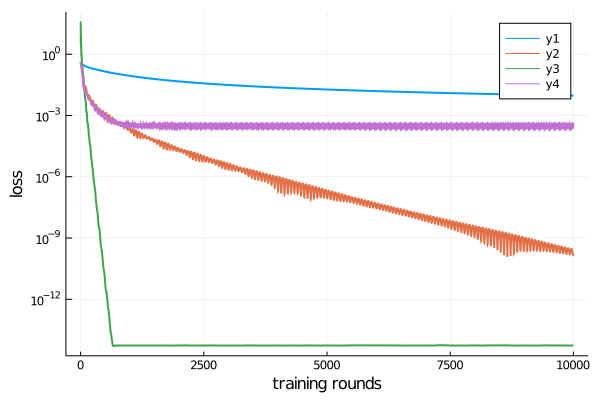

In [424]:
using Plots
using LinearAlgebra

p_out = sqrt.(sum((x_out .- x_opt).^2, dims=1)');
p_gd = sqrt.(sum((x_gd .- x_opt).^2, dims=1)');
p_amd = sqrt.(sum((x_amd .- x_opt).^2, dims=1)');
p_amd2 = sqrt.(sum((x_amd2 .- x_opt).^2, dims=1)');

plot(max.(hcat(p_gd,p_amd,p_amd2,p_out),1e-20),yaxis=:log,linewidth=2,xlabel="training rounds",ylabel="loss")

In [422]:
A

1486.9649239077028

In [408]:
α

0.29723687883771555

In [389]:
norm(x_opt)

0.44555466332091304

In [390]:
accu_noise

0

In [391]:
accu_noise / A

0.0

In [392]:
noise

0